Decision Tree

In [74]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay

Reading the testing and trained data from excel file

In [53]:
X_train = pd.read_csv('train_X_In-Car-Rec.csv')
y_train = pd.read_csv('train_y_In-Car-Rec.csv')
X_test  = pd.read_csv('test_X_In-Car-Rec.csv')
y_test  = pd.read_csv('test_y_In-Car-Rec.csv')

HyperParameter tuning and fitting the model

In [65]:
param_grid_random = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [66]:
#Defining a function
scorer = make_scorer(fbeta_score, beta=2)

In [67]:
# change n_iter to 250 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=1), 
        scoring=scorer, 
        param_distributions=param_grid_random, 
        n_iter = 250, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
       random_state=1
    )
_ = best_random_search_model.fit(X_train, y_train)


C:\Users\Ramya\Downloads\New folder\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 90 is smaller than n_iter=250. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [68]:
random_search_best_params = best_random_search_model.best_params_
random_search_best_params

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 5,
 'criterion': 'entropy'}

In [69]:
dtree = DecisionTreeClassifier(max_depth=5,min_samples_split = 2,min_samples_leaf = 4,criterion='entropy')
dtree=dtree.fit(X_train, y_train)

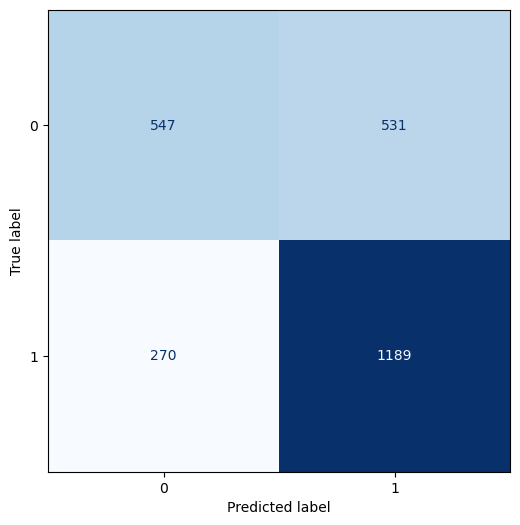

In [70]:
# Display the confusion matrix
cm = confusion_matrix(y_test, dtree.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
   y_test, dtree.predict(X_test), display_labels=dtree.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [71]:
# Calculate f1_score on the test data
f2_score = fbeta_score(y_test, dtree.predict(X_test), average='weighted', beta=2)
print(f"F2Score for the decision tree Classifier Model is: {f2_score}")

F2Score for the decision tree Classifier Model is: 0.6790558575356443


In [72]:
accuracy = accuracy_score(y_train, dtree.predict(X_train))
print(f"Accuracy: {accuracy}")
precision = precision_score(y_train, dtree.predict(X_train), average='weighted')
print(f"Precision: {precision}")
recall = recall_score(y_train, dtree.predict(X_train),average='weighted')
print(f"Recall: {recall}")

Accuracy: 0.6762589928057554
Precision: 0.6742470120899818
Recall: 0.6762589928057554


### Using Grid Search

In [77]:
param_gridSearch = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), param_grid=param_gridSearch, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring=make_scorer(fbeta_score, beta=2))

In [78]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [83]:
best_estimator

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=1)

In [84]:
decisionTree = DecisionTreeClassifier()
decisionTree.set_params(**best_params)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [85]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

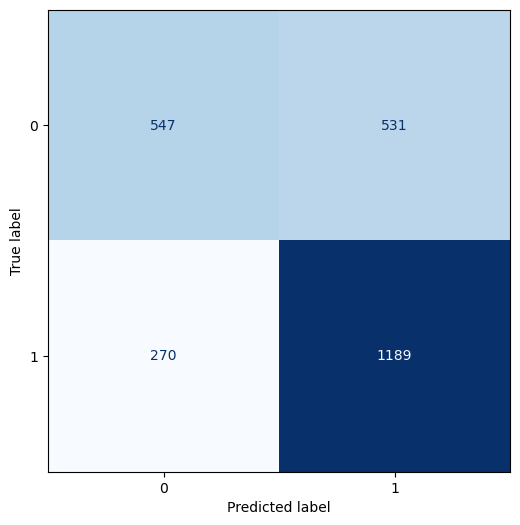

In [86]:
# Display the confusion matrix
cm = confusion_matrix(y_test, dtree.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 6))

ConfusionMatrixDisplay.from_predictions(
   y_test, dtree.predict(X_test), display_labels=dtree.classes_, ax=ax, colorbar=False, cmap=plt.cm.Blues
)

plt.show()

In [87]:
# Calculate f1_score on the test data
f2_score = fbeta_score(y_test, dtree.predict(X_test), average='weighted', beta=2)
print(f"F2Score for the decision tree Classifier Model is: {f2_score}")

F2Score for the decision tree Classifier Model is: 0.6790558575356443


In [88]:
accuracy = accuracy_score(y_train, dtree.predict(X_train))
print(f"Accuracy: {accuracy}")
precision = precision_score(y_train, dtree.predict(X_train), average='weighted')
print(f"Precision: {precision}")
recall = recall_score(y_train, dtree.predict(X_train),average='weighted')
print(f"Recall: {recall}")

Accuracy: 0.6762589928057554
Precision: 0.6742368129999382
Recall: 0.6762589928057554
